In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [22]:
df = pd.read_csv('StressLevelDataset.csv')
df.shape[0]

1100

In [23]:
df['stress_level'].unique()

array([1, 2, 0])

In [24]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


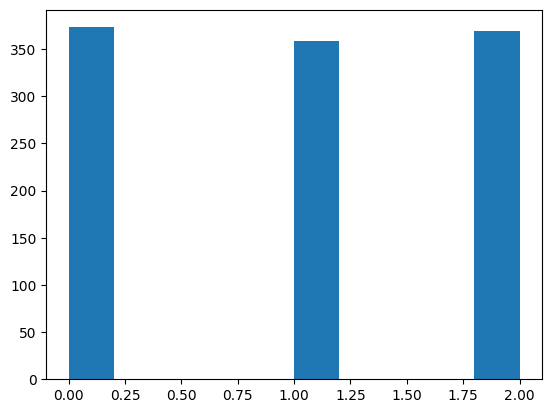

In [25]:
plt.hist(df['stress_level'])
plt.show()

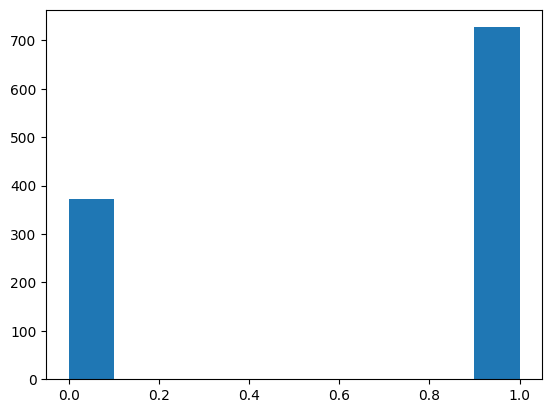

In [26]:
updated_rows = df["stress_level"] >= 1
df.loc[updated_rows, "stress_level"] = 1
plt.hist(df['stress_level'])
plt.show()

In [27]:
features, label = df.iloc[:,:-1], df["stress_level"]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1, stratify=label)
scaler = preprocessing.StandardScaler().fit(X_train)

In [28]:
scaled_train_df = scaler.transform(X_train)
scaled_test_df = scaler.transform(X_test)

In [29]:
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(scaled_train_df,y_train)
    print('k = ' +str(k)+', score: '+str(knn.score(scaled_test_df, y_test)))

k = 1, score: 0.9136363636363637
k = 2, score: 0.8909090909090909
k = 3, score: 0.9181818181818182
k = 4, score: 0.9181818181818182
k = 5, score: 0.9363636363636364
k = 6, score: 0.9272727272727272
k = 7, score: 0.9363636363636364
k = 8, score: 0.9363636363636364
k = 9, score: 0.9454545454545454
k = 10, score: 0.9409090909090909
k = 11, score: 0.9454545454545454
k = 12, score: 0.9454545454545454
k = 13, score: 0.9454545454545454
k = 14, score: 0.9454545454545454
k = 15, score: 0.95
k = 16, score: 0.95
k = 17, score: 0.95
k = 18, score: 0.95
k = 19, score: 0.95


In [30]:
#k-fold cross validaton
from sklearn.model_selection import cross_val_score
for k in range(1,40):
    knn_cv = KNeighborsClassifier(n_neighbors = k)

    cv_scores = cross_val_score(knn_cv, scaled_train_df, y_train, cv=5)

    #print each cv score (accuracy) and average them
#     print(cv_scores)
#     print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    print('k = ' +str(k)+', score: '+str(np.mean(cv_scores)))

k = 1, score: 0.9181818181818182
k = 2, score: 0.8977272727272727
k = 3, score: 0.9181818181818182
k = 4, score: 0.9125
k = 5, score: 0.9215909090909091
k = 6, score: 0.9204545454545455
k = 7, score: 0.9227272727272726
k = 8, score: 0.9170454545454545
k = 9, score: 0.9238636363636363
k = 10, score: 0.9227272727272726
k = 11, score: 0.925
k = 12, score: 0.9238636363636363
k = 13, score: 0.9238636363636363
k = 14, score: 0.9238636363636363
k = 15, score: 0.925
k = 16, score: 0.925
k = 17, score: 0.925
k = 18, score: 0.925
k = 19, score: 0.9261363636363636
k = 20, score: 0.9261363636363636
k = 21, score: 0.9261363636363636
k = 22, score: 0.9261363636363636
k = 23, score: 0.9261363636363636
k = 24, score: 0.925
k = 25, score: 0.9261363636363636
k = 26, score: 0.9261363636363636
k = 27, score: 0.9261363636363636
k = 28, score: 0.9261363636363636
k = 29, score: 0.9261363636363636
k = 30, score: 0.9261363636363636
k = 31, score: 0.9261363636363636
k = 32, score: 0.925
k = 33, score: 0.9261363

In [31]:
#create new a knn model pipeline
knn_pipeline = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
#create a dictionary of all parameters we want to find out the best parameter
param_grid = {'knn__n_neighbors': np.arange(1, 40)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_pipeline, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

knn_best_pipeline = knn_gscv.best_estimator_
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)
# print(knn_best_model)

{'knn__n_neighbors': 19}
0.9261363636363636


In [32]:
#create new a decision tree model pipeline
dt_pipeline = Pipeline(steps=[("scaler", StandardScaler()), ("dt", tree.DecisionTreeClassifier())])
param_grid = {'dt__max_depth':range(1,20)}
# Grid search to get the best decision tree model
dt_gscv = GridSearchCV(dt_pipeline, param_grid, n_jobs=4, cv=5)

dt_gscv.fit(X_train, y_train)

dt_best_pipeline = dt_gscv.best_estimator_
print (dt_gscv.best_score_, dt_gscv.best_params_)
dt_best_model = dt_best_pipeline.steps[-1][1]
print(dt_best_model)

0.928409090909091 {'dt__max_depth': 2}
DecisionTreeClassifier(max_depth=2)


[Text(0.5, 0.8333333333333334, 'x[12] <= 0.542\ngini = 0.448\nsamples = 880\nvalue = [298, 582]'),
 Text(0.25, 0.5, 'x[8] <= -0.873\ngini = 0.118\nsamples = 590\nvalue = [37, 553]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.494\nsamples = 38\nvalue = [17, 21]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.07\nsamples = 552\nvalue = [20, 532]'),
 Text(0.75, 0.5, 'x[1] <= 0.653\ngini = 0.18\nsamples = 290\nvalue = [261, 29]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.469\nsamples = 40\nvalue = [15, 25]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.031\nsamples = 250\nvalue = [246, 4]')]

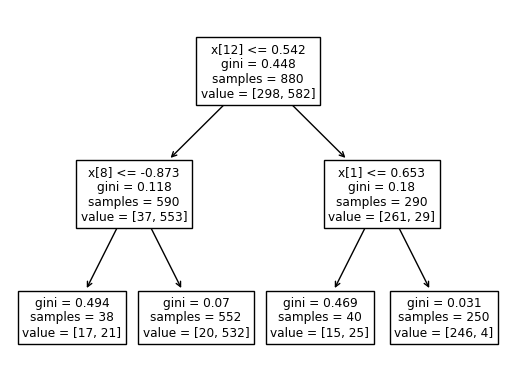

In [33]:
tree.plot_tree(dt_best_model)

In [34]:
#create new a random forest tree model pipeline
rft_pipeline = Pipeline(steps=[("scaler", StandardScaler()), ("rft", RandomForestClassifier(random_state=0))])
param_grid = {'rft__max_depth':range(1,20)}

# Grid search to get the best random forest tree model
rft_gscv = GridSearchCV(rft_pipeline, param_grid, n_jobs=4, cv=5)

rft_gscv.fit(X_train, y_train)

rft_best_pipeline = rft_gscv.best_estimator_
print(rft_gscv.best_score_, rft_gscv.best_params_)
# print(rft_best_model)

0.9306818181818182 {'rft__max_depth': 10}


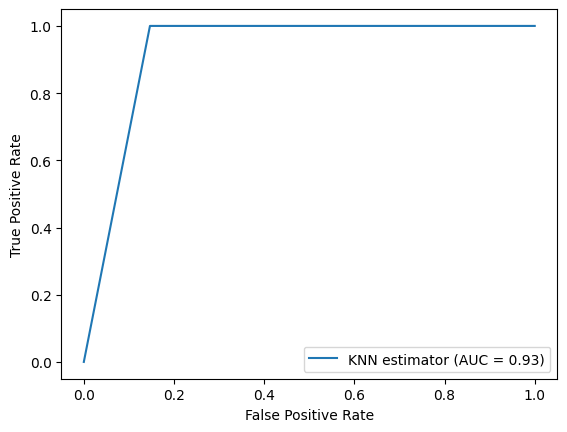

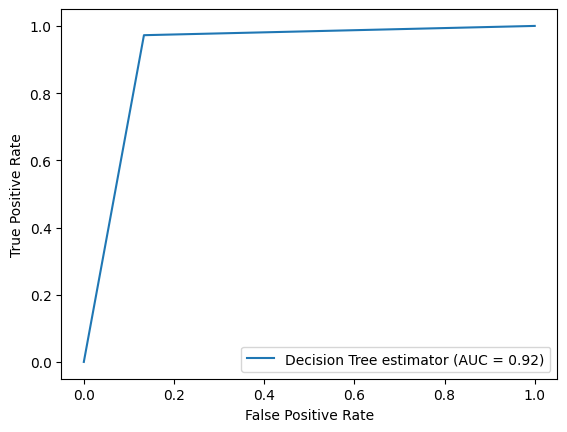

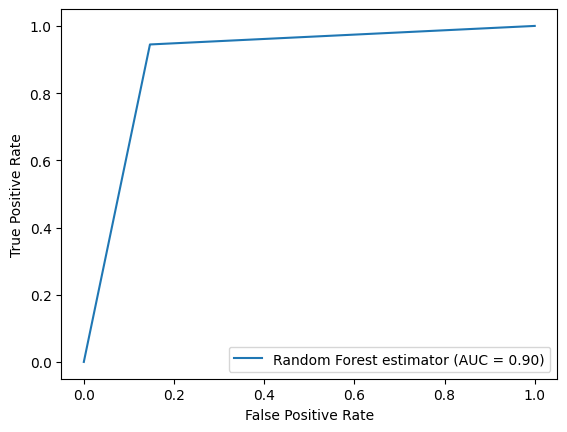

In [35]:
# KNN
pred = knn_best_pipeline.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN estimator')
display.plot()
plt.show()

# Decision tree
pred = dt_best_pipeline.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree estimator')
display.plot()
plt.show()

# Random Forest Tree
pred = rft_best_pipeline.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest estimator')
display.plot()
plt.show()

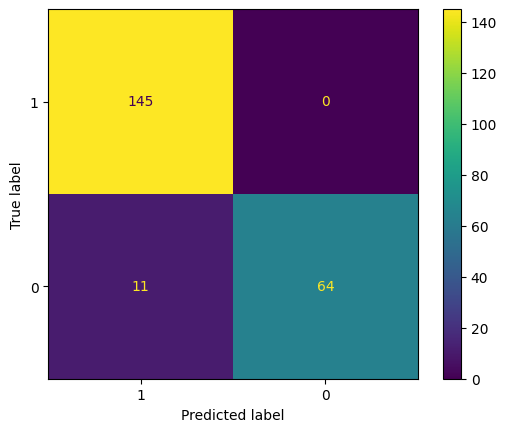

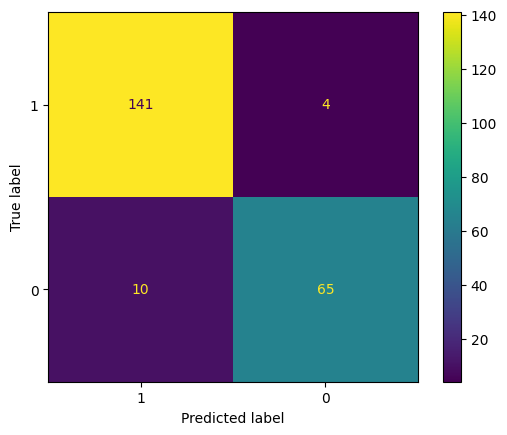

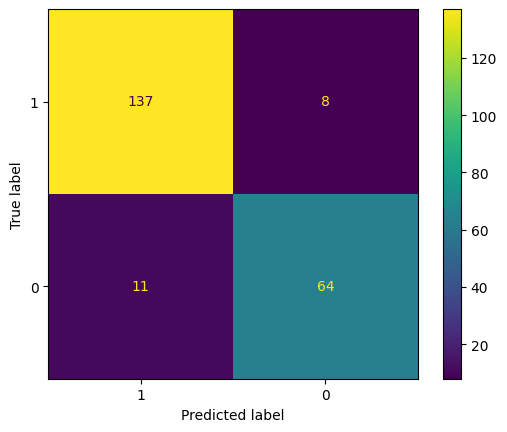

In [36]:
classes = y_test.unique()

# KNN
pred = knn_best_pipeline.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=classes)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()
plt.show()

# Decision tree
pred = dt_best_pipeline.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=classes)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()
plt.show()

# Random Forest Tree
pred = rft_best_pipeline.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=classes)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()
plt.show()

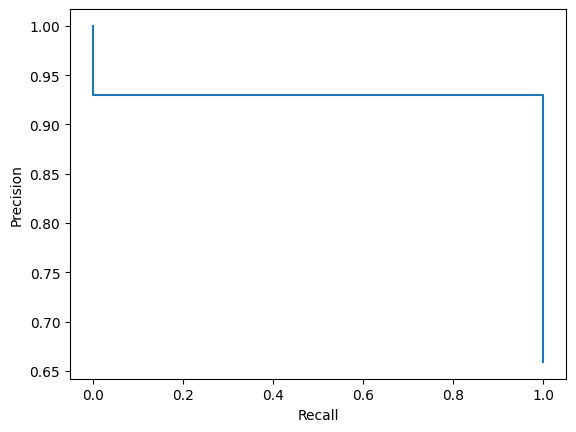

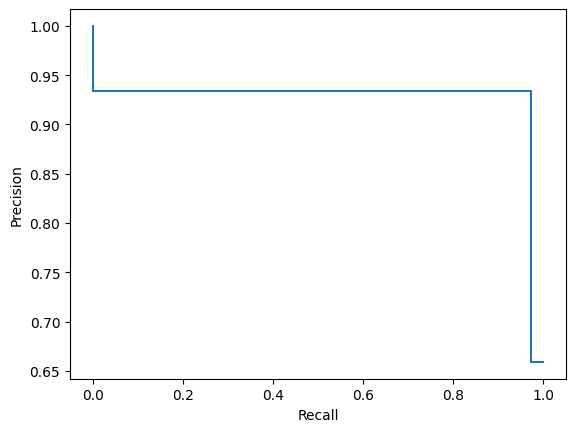

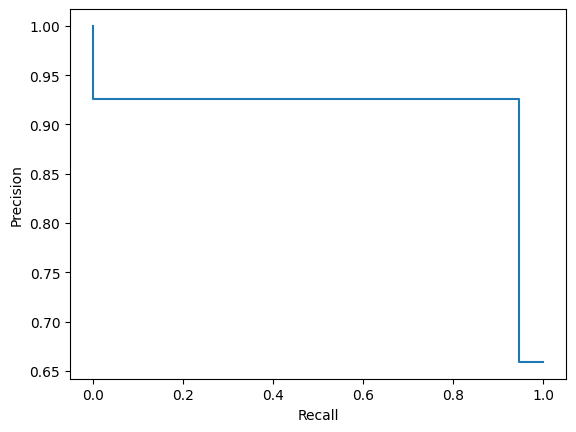

In [37]:
# KNN
predictions = knn_best_pipeline.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.show()

# Decision tree
predictions = dt_best_pipeline.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.show()

# Random Forest Tree
predictions = rft_best_pipeline.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.show()